In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, ParameterGrid, StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# загружаю данные
table = pd.read_csv("/home/tunelix/dev/experiments/kolya/data.csv", 
                    index_col=False,
                    names=['family', 'rus_name', 'lat_name', 'crude', 'marker', 'anti_germ', 'spectrum', 'cosy'])
# удаляю пустую колонку
#table = table.drop('marker', 1)
# убрал пустые строки
table.dropna(subset=['family'], inplace=True)
# колонка с данными через запятую
# table['marker'] = table['marker'].apply(lambda x : [r.strip() for r in str(x).replace('\n', ' ').split(',')])
# обрабатываем скобки
table['marker'] = table['marker'].apply(lambda x : [r.strip() for r in str(x).replace('\n', ' ').
                                                    replace('(', ',').replace(')', ',').replace(';', ',').split(',') if r.strip() !=''])
#able_short = table[['family', 'crude', 'cosy', 'marker', 'anti_germ', 'lat_name']]

In [3]:
table

,family,rus_name,lat_name,crude,marker,anti_germ,spectrum,cosy
0,Аирные,Аир болотный,Acorus calamus,корень,"[эфирное масло, фенольные соединения, простые ...",1.04,0.5041,0.71
2,Аралиевые,Элеутерококк колючий,Eleutherococcus senticosus,корень,"[фенольные соединения, гидроксикоричные кислот...",1.70,0.9604,0.98
4,Астровые,Белокопытник лекарственный,Petasites hybridus,корень,"[сапонины, фенольные соединения, флавоноиды, д...",0.93,0.5041,0.71
5,Астровые,Девясил высокий,Inula helenium,корень,"[эфирное масло, полисахариды]",1.43,0.8281,0.91
6,Астровые,Календула лекарственная,Calendula officinalis,цветки,"[сапонины, фенольные соединения, флавоноиды]",1.56,0.6400,0.80
7,Астровые,Левзея сафлоровидная,Rhaponticum carthamoides,корневища,"[ситостероиды, фенольные соединения, флавоноиды]",1.75,0.9604,0.98
8,Астровые,Лопух большой,Arctium lappa,корень,"[полисахариды, фенольные соединения, лигнаны]",1.37,0.9801,0.99
9,Астровые,Лопух большой,Arctium lappa,плоды,[полисахариды],1.14,0.6561,0.81
10,Астровые,Мордовник шаровидный,Echinops sphaerocephalus,семена,[алкалоиды],1.47,0.8100,0.90
11,Астровые,Пижма обыкновенная,Tanacetum vulgare,цветки,"[фенольные соединения, флавоноиды, эфирное масло]",1.15,0.6400,0.80


In [4]:
# dummies для поля-списка
table_dummy = table.join(pd.get_dummies(
                    pd.Series(table['marker'].apply(pd.Series).stack().reset_index(1, drop=True), name='marker1'),
                    prefix='marker').sum(level=0)).drop('marker', axis=1)

In [5]:
# table_dummy.shape[0]  == table.shape[0]
table = table_dummy
table_short = table
table_short = table_short.drop('spectrum', 1)
print table_short.shape

(156, 33)


In [6]:
# добавялем случайную колонку
# table_short = table_short.join(pd.Series(np.random.rand(table_short.shape[0]*2), name='rand'))

In [7]:
table_short

,family,rus_name,lat_name,crude,anti_germ,cosy,marker_алкалоиды,marker_антрахиноны,marker_аскорбиновая кислота,marker_гидроксикоричные кислоты,...,marker_ситостероиды,marker_фенольные соединеия,marker_фенольные соединения,marker_фитостерол,marker_флаволигнаны,marker_флавоноиды,marker_фурокумарины,marker_хиноны,marker_эфирное масло,marker_эфирные масла
0,Аирные,Аир болотный,Acorus calamus,корень,1.04,0.71,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,Аралиевые,Элеутерококк колючий,Eleutherococcus senticosus,корень,1.70,0.98,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,Астровые,Белокопытник лекарственный,Petasites hybridus,корень,0.93,0.71,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,Астровые,Девясил высокий,Inula helenium,корень,1.43,0.91,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,Астровые,Календула лекарственная,Calendula officinalis,цветки,1.56,0.80,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7,Астровые,Левзея сафлоровидная,Rhaponticum carthamoides,корневища,1.75,0.98,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
8,Астровые,Лопух большой,Arctium lappa,корень,1.37,0.99,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,Астровые,Лопух большой,Arctium lappa,плоды,1.14,0.81,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Астровые,Мордовник шаровидный,Echinops sphaerocephalus,семена,1.47,0.90,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Астровые,Пижма обыкновенная,Tanacetum vulgare,цветки,1.15,0.80,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [8]:
# убираем единичные данные
crude_more_one = [title for title,count, in table.crude.value_counts().iteritems() if count>1]
#rpt[table['crude'].isin(stk_list)]
#table = table[table['crude'].isin(crude_more_one)]

family_more_one = [title for title,count, in table.family.value_counts().iteritems() if count>1]
#rpt[table['crude'].isin(stk_list)]
#table = table[table['family'].isin(family_more_one)]

In [9]:
table.crude.value_counts()

трава                 46
корень                31
лист                  25
кора                   9
семена                 8
цветки                 6
плоды                  5
корень и корневища     3
лепестки               2
почки                  2
слоевища               2
соцветия               1
ветки                  1
побеги                 1
шишки                  1
конеплод               1
листья                 1
ликоподий              1
трава с цветком        1
цветки и листья        1
трава и плоды          1
плод                   1
бутоны                 1
соплодия               1
клубни                 1
корневища              1
мякоть плодов          1
трава и корни          1
Name: crude, dtype: int64

In [10]:
table.family.value_counts()

Астровые            16
Бобовые             15
Розовые             15
Яснотковые           9
Зонтичные            9
Вересковые           8
Березовые            5
Крушиновые           5
Гречишные            5
Маковые              4
Мареновые            4
Ивовые               3
Подорожниковые       3
Лютиковые            2
Пасленовые           2
Горечавковые         2
Щитовниковые         2
Плауновые            2
Тутовые              2
Рутовые              2
Фиалковые            2
Крапивные            2
Гвоздичные           2
Маслиновые           2
Пармелиевые          2
Бурачниковые         2
Гинкговые            1
Буковые              1
Крыжовниковые        1
Зверобойные          1
Ксанторреевые        1
Мальвовые            1
Льновые              1
Кирказоновые         1
Коноплевые           1
Кипрейные            1
Пионовые             1
Капустные            1
Конскокаштановые     1
Аирные               1
Кувшинковые          1
Ореховые             1
Хвощевые             1
Страстоцвет

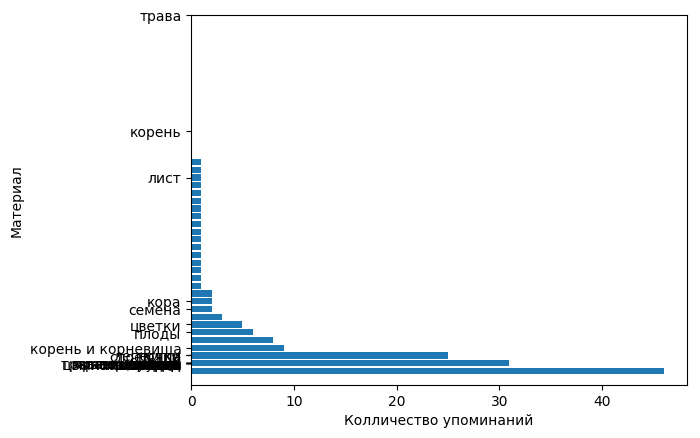

In [11]:
# несбалансированность данных
keys = table.crude.value_counts().index
values = table.crude.value_counts().values

plt.barh(range(len(keys)), values, align='center')
plt.yticks(values, keys)
plt.xlabel("Колличество упоминаний")
plt.ylabel("Материал")
plt.show()

In [12]:
# подготовка данных
# нельзя масштабировать учитывая тест. только на трейне

# делаю dummies поля для категорий
table_short = shuffle(table_short)
table_dummies = pd.get_dummies(table_short.drop('anti_germ', 1).
                                           drop('cosy', 1).
                                           drop('rus_name', 1).
                                           drop('lat_name', 1))
features = table_dummies.loc[:, :]

# Извлекаем массивы NumPy
X = features.values
y = table_short['anti_germ']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [13]:
# кросс валидация. модели регресси
models = [LinearRegression(), Ridge(alpha=1), Lasso(alpha=0.01, max_iter=100000),
          KNeighborsRegressor(n_neighbors=15), SVR(), RandomForestRegressor(n_estimators=100), 
          MLPRegressor(hidden_layer_sizes=(20,), max_iter=100000), BayesianRidge(), 
          ElasticNet(alpha=0.01), GradientBoostingRegressor(alpha=0.01,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)]

In [14]:
df = pd.DataFrame([], columns=['mean', 'deviation', 'regressor'])
for model in models:
    # отключил скалер
    # cross_val = cross_val_score(model, StandardScaler().fit(X).transform(X), y, cv=5)
    cross_val = cross_val_score(model, X, y, cv=5)
    #print("{:.3f}".format(cross_val.mean()),"{:.3f}".format(cross_val.std()),
    #      model.__class__.__name__)
    df = df.append(pd.DataFrame([["{:.3f}".format(cross_val.mean()),
                                  "{:.3f}".format(cross_val.std()), 
                                  model.__class__.__name__]], 
                                columns=['mean', 'deviation', 'regressor']),
                   ignore_index=True)
df.sort_values(['mean'], ascending=[0])

,mean,deviation,regressor
4,0.155,0.059,SVR
7,0.155,0.084,BayesianRidge
2,0.154,0.063,Lasso
8,0.146,0.081,ElasticNet
3,0.140,0.066,KNeighborsRegressor
5,0.069,0.132,RandomForestRegressor
9,0.042,0.266,GradientBoostingRegressor
0,-2287664343240256297893888.000,1422001042356532001374208.000,LinearRegression
6,-0.523,0.347,MLPRegressor
1,-0.010,0.155,Ridge


In [18]:
df = pd.DataFrame([], columns=['mean', 'deviation', 'regressor'])
for model in models:
    cross_val = cross_val_score(model, MinMaxScaler().fit(X).transform(X), y, cv=5)
    #print "{:.3f}".format(cross_val.mean()), model.__class__.__name__
    df = df.append(pd.DataFrame([["{:.3f}".format(cross_val.mean()),
                                  "{:.3f}".format(cross_val.std()), 
                                  model.__class__.__name__]], 
                                columns=['mean', 'deviation', 'regressor']),
                   ignore_index=True)
df.sort_values(['mean'], ascending=[0])

,mean,deviation,regressor
4,0.155,0.059,SVR
7,0.155,0.084,BayesianRidge
2,0.154,0.063,Lasso
8,0.146,0.081,ElasticNet
3,0.140,0.066,KNeighborsRegressor
5,0.069,0.140,RandomForestRegressor
9,0.042,0.266,GradientBoostingRegressor
0,-2287664343240256297893888.000,1422001042356532001374208.000,LinearRegression
6,-0.849,0.580,MLPRegressor
1,-0.010,0.155,Ridge


In [19]:
df = pd.DataFrame([], columns=['mean', 'deviation', 'regressor'])
for model in models:
    cross_val = cross_val_score(model, RobustScaler().fit(X).transform(X), y, cv=5)
    df = df.append(pd.DataFrame([["{:.3f}".format(cross_val.mean()),
                                  "{:.3f}".format(cross_val.std()), 
                                  model.__class__.__name__]], 
                                columns=['mean', 'deviation', 'regressor']),
                   ignore_index=True)
df.sort_values(['mean'], ascending=[0])

,mean,deviation,regressor
4,0.155,0.059,SVR
7,0.155,0.084,BayesianRidge
2,0.154,0.063,Lasso
8,0.146,0.081,ElasticNet
3,0.140,0.066,KNeighborsRegressor
5,0.068,0.126,RandomForestRegressor
9,0.042,0.266,GradientBoostingRegressor
0,-2428738862781400174559232.000,3210880263481265817124864.000,LinearRegression
6,-0.646,0.650,MLPRegressor
1,-0.010,0.155,Ridge


In [20]:
X_train.shape, X_test.shape

((117, 110), (39, 110))

In [22]:
# обучение модели

#scaler = StandardScaler().fit(X_train)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#lr = LinearRegression().fit(X_train_scaled, y_train)
#lr = Ridge(alpha=1).fit(X_train_scaled, y_train)
#lr = Lasso(alpha=0.001, max_iter=100000).fit(X_train_scaled, y_train)
#lr = ElasticNet(alpha=0.001).fit(X_train_scaled, y_train)
#lr = KNeighborsRegressor(n_neighbors=15).fit(X_train_scaled, y_train)
lr = SVR().fit(X_train_scaled, y_train)
#lr = RandomForestRegressor(n_estimators=200).fit(X_train_scaled, y_train)
#lr = BayesianRidge().fit(X_train_scaled, y_train)
#lr = GradientBoostingRegressor().fit(X_train_scaled, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test_scaled, y_test)))
#print("Количество использованных признаков: {}".format(np.sum(lr.coef_ != 0)))

Правильность на обучающем наборе: 0.31
Правильность на тестовом наборе: 0.16


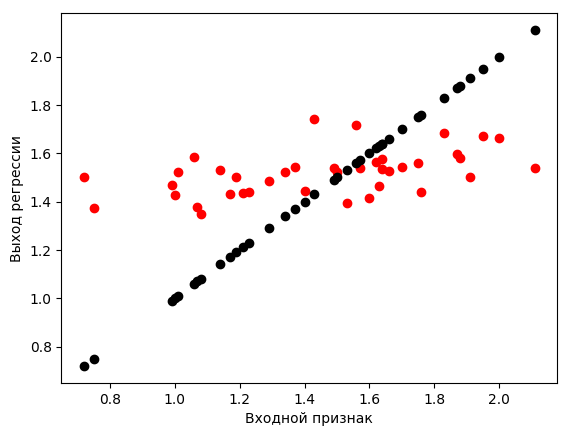

In [23]:
# пробуем строит граффик 
plt.plot(y_test, lr.predict(X_test), 'ro', label="предсказание")
plt.plot(y_test, y_test, 'o', c='k')
#plt.plot(y, lr.predict(X), 'ro', label="предсказание")
#plt.plot(y, y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
#plt.legend(loc="best")
plt.show()

форма массива X_train: (117, 110)
форма массива X_train_selected: (117, 55)
Правильность на обучающем наборе: 0.23
Правильность на тестовом наборе: 0.12
[False  True False  True  True  True  True  True False False False  True
 False False  True  True  True  True False  True  True False  True False
  True  True False  True False  True False  True  True  True False False
  True  True  True False False False  True False False  True  True False
 False False False False False  True False False False False  True False
  True False  True  True  True False False False False  True False  True
  True  True False  True False False  True  True  True  True False  True
 False False  True  True  True  True False False  True False False False
 False False  True  True False  True False  True  True False False  True
  True False]


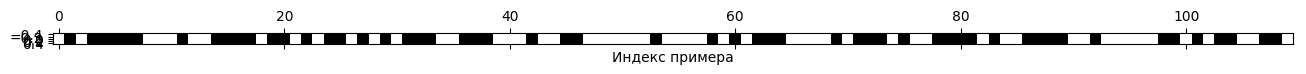

In [25]:
from sklearn.feature_selection import SelectPercentile

# используем f_classif (по умолчанию)
# и SelectPercentile, чтобы выбрать 50% признаков
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select.transform(X_train)
print("форма массива X_train: {}".format(X_train.shape))
print("форма массива X_train_selected: {}".format(X_train_selected.shape))

X_test_selected = select.transform(X_test)
lr = KNeighborsRegressor(n_neighbors=15).fit(select.transform(X_train), y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(select.transform(X_train), y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(select.transform(X_test), y_test)))


mask = select.get_support()
print(mask)
# визуализируем булевы значения: черный – True, белый – False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Индекс примера")
plt.show()

**Подключаем вторую таблицу**

In [6]:
herbs = pd.read_csv("/home/tunelix/dev/experiments/kolya/herbs.csv", 
                    index_col=False)
len(herbs[herbs['Chemical Constituents'] != ''])
#herbs.query("'Chemical Constituents' != ''")

271

In [436]:
lat_herb = [a[0].strip() for a in herbs[['Latin Name(s)']].values.tolist() if type(a[0]) == str]
lat_table = [a[0].strip() for a in table[['lat_name']].values.tolist() if type(a[0]) == str]

In [574]:
from_wiki = ['Quercus robur',
 'Passiflora',
 'Echinacea purpurea',
 'Polygonum aviculare',
 'Phellodendron amurense',
 'Mentha piperita',
 'Leonurus cardiaca',
 'Alnus incana',
 'Agrimonia eupatoria',
 'Calluna vulgaris',
 'Galium aparine',
 'Saponaria officinalis',
 'Silybum marianum',
 'Sanguisorba officinalis',
 'Foeniculum vulgare',
 'Hypericum perforatum',
 'Glycyrrhiza glabra',
 'Acorus calamus',
 'Sophora japonica',
 'Melissa officinalis',
 'Ruta graveolens']
intersect = set(lat_table) & set(lat_herb+from_wiki)
print len(intersect)



49


In [432]:
len(lat_herb)

270

In [433]:
# поле с данными через запятую превращаем в список
herbs['Chemical Constituents'] = herbs['Chemical Constituents'].apply(lambda x : [r.strip() for r in str(x).replace('\n', ' ').split(',')])

In [439]:
herbs[0:10]

,Common Name,Parts Used,Latin Name(s),Family,Properties & Uses,Chemical Constituents
0,Abelmosk,seeds,Hibiscus moschatus,Malvaceae,"nervine, perfume, aphrodisiac,\ndemulcent",NaN
1,Acacia,gum resin,"Acacia senegal, A. vera",Leguminoseae,"gum, sweets, adhesives, demulcent","gums, tannins"
2,Agrimony,leaves,Agrimonia eupatoria,Rosaceae,"dye, tonic, astringent, vulnerary,\ndiuretic, ...",NaN
3,Alfalfa,"leaves,\nsprouts",Medicago sativa,Leguminosae,nutritive,protein
4,Allspice,seeds,Pimenta officinalis,Myrtaceae,"spice, carminative","eugenol, cineole,\ncaryophyllene"
5,"Allspice, Carolina",bark,Calycanthus floridus,Calycanthaceae,"fragrance, spice, cinnamon\nsubstitute, antisp...",NaN
6,Aloe,leaves,"Aloe barbadoensis, A.\nvera var. officinalis",Liliaceae,"antiseptic, burn ointment, purgative,\nGI irri...","barbaloin O-pentosides,\naloinosides, chrysoph..."
7,Anatto,seeds,Bixa orellana,Bixaceae,tasteless yellow food dye,NaN
8,Angelica,root,"Angelica archangelica, A.\nsinensis, A. spp.",Umbelliferae,"spice, candies, expectorant,\ncarminative, dia...","angleic, fumaric, caffeic,\nchrorogenic acids,..."
9,Angostura,bark,"Angostura febrifuga,\nGalipea officinalis",Rutaceae,"bitter stomachic, appetite stimulant,\ncarmina...","quinolines: cusparine,\ncuspareine, galipine,\..."


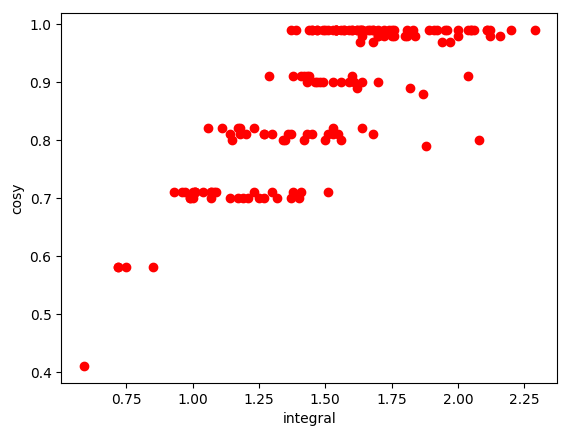

In [22]:
# граффик зависимости cosy и anti_germ
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(table['anti_germ'].values, table['cosy'].values, 'ro')
ax.set_xlabel('integral')
ax.set_ylabel('cosy')
plt.show()